In [47]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt, animation as animation, ticker as mticker
from matplotlib.pyplot import cm
import pandas as pd
from tqdm.notebook import tqdm

from fireworks.particles import Particles
import fireworks.nbodylib.nunits as NU
import fireworks.nbodylib.potentials as fnp
import fireworks.nbodylib.dynamics as fnd
import fireworks.nbodylib.integrators as fni

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [ ]:
# Retrieving cluster centers with highest density points
labels = dbscan.labels_
unique_labels = set(labels) - {-1}  # Exclude noise points
cluster_centers = []
for label in unique_labels:
    cluster_points = X[labels == label]
    density_sums = []
    for point in cluster_points:
        density_sum = np.sum(np.linalg.norm(cluster_points - point, axis=1))
        density_sums.append(density_sum)
    highest_density_index = np.argmin(density_sums)
    highest_density_point = cluster_points[highest_density_index]
    cluster_centers.append(highest_density_point)

In [2]:
N = 500
initial_position = 10   #pos del 
M_G = 1e3               # mass of the galaxy

In [3]:
# the Particles are already in Henon units, so in Nbody units
path = './data/Plummer_Nbody_virial_' + str(N) + '.csv'
data = pd.read_csv(path).values
particles = Particles(position= data[:, 4:],  velocity = data[:, 1:4], mass = data[:, 0])
particles.set_flag(np.ones(shape=particles.mass.shape))


# move the stars in the frame of reference of the center of mass
particles.pos = particles.pos - particles.com_pos()
particles.vel = particles.vel - particles.com_vel()
print('Move to Center of mass reference frame:', '\n', 'pos Center of Mass:', particles.com_pos(), 'vel Center of Mass', particles.com_vel())

# move the stars in circular orbit 
particles.pos[:, 0] = particles.pos[:, 0] + initial_position*np.ones(len(particles))
print()
print('Move Center of mass to x=5, y=z=0:', '\n', 'pos Center of Mass:', particles.com_pos(), 'vel Center of Mass', particles.com_vel())

particles.vel[:, 1] = particles.vel[:, 1] + np.sqrt(M_G / particles.com_pos()[0]) 
print()
print('Give Center of Mass to vel_x=vel_z=0, vel_y=sqrt(M_G/x):', '\n', 'pos Center of Mass:', particles.com_pos(), 'vel Center of Mass', particles.com_vel())

# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')

# ax.scatter(xs = particles.pos[:, 0], ys = particles.pos[:, 1], zs = particles.pos[:, 2])
# ax.scatter(xs = 0, ys = 0, zs = 0, s=10)

Move to Center of mass reference frame: 
 pos Center of Mass: [-2.38524478e-17 -8.67361738e-18  5.20417043e-18] vel Center of Mass [ 6.93889390e-18  6.93889390e-18 -2.77555756e-17]

Move Center of mass to x=5, y=z=0: 
 pos Center of Mass: [ 1.00000000e+01 -8.67361738e-18  5.20417043e-18] vel Center of Mass [ 6.93889390e-18  6.93889390e-18 -2.77555756e-17]

Give Center of Mass to vel_x=vel_z=0, vel_y=sqrt(M_G/x): 
 pos Center of Mass: [ 1.00000000e+01 -8.67361738e-18  5.20417043e-18] vel Center of Mass [ 6.93889390e-18  1.00000000e+01 -2.77555756e-17]


In [13]:
num_clusters = 1

# Apply K-means algorithm
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(particles.pos)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Display centroids
print("Cluster centroids:")
for centroid in centroids:
    print(centroid)

Cluster centroids:
[1.00000000e+01 1.99840144e-18 9.99200722e-19]


/home/bertinelli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


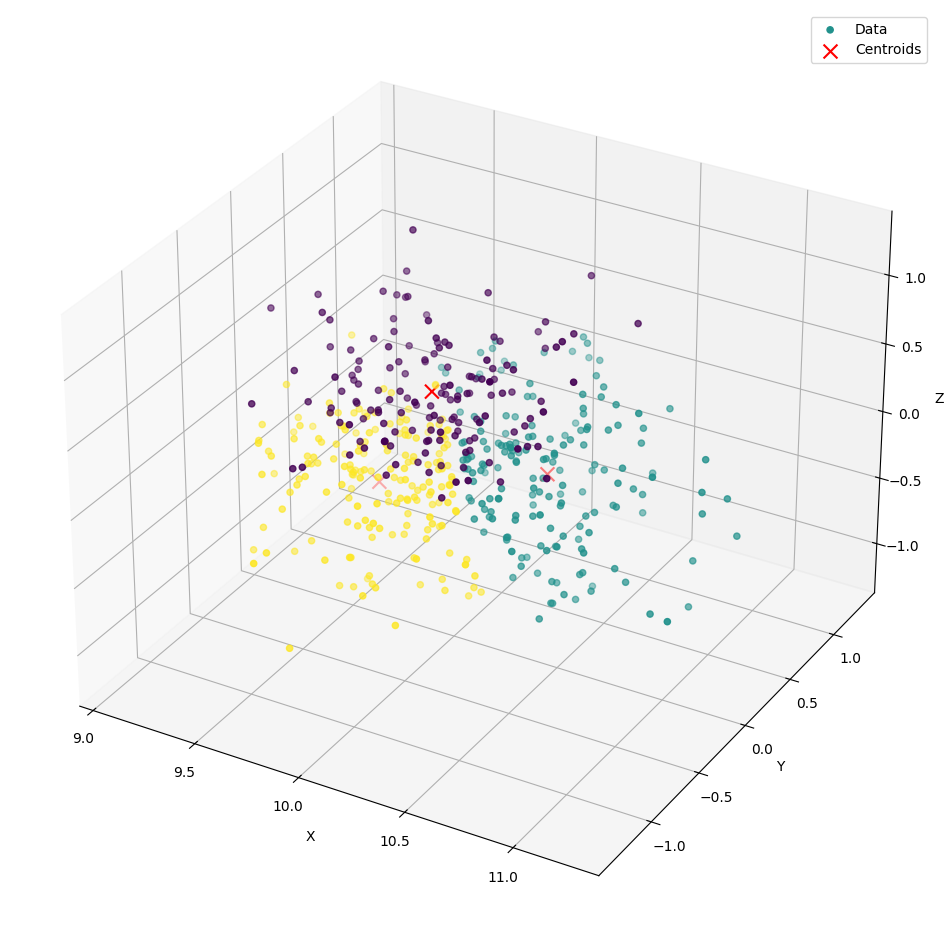

In [12]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# Plot data
ax.scatter(xs=particles.pos[:, 0], ys=particles.pos[:, 1], zs=particles.pos[:, 2], c=kmeans.labels_, label='Data')
# Plot K-means result
ax.scatter(xs=kmeans.cluster_centers_[:, 0], ys=kmeans.cluster_centers_[:, 1], zs=kmeans.cluster_centers_[:, 2], c='red', marker='x', s=100, label='Centroids')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


/home/bertinelli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centroids:
[-1.46671909  9.84208501  0.13436053]
[-47.86675139 -41.09253775 -99.78079138]


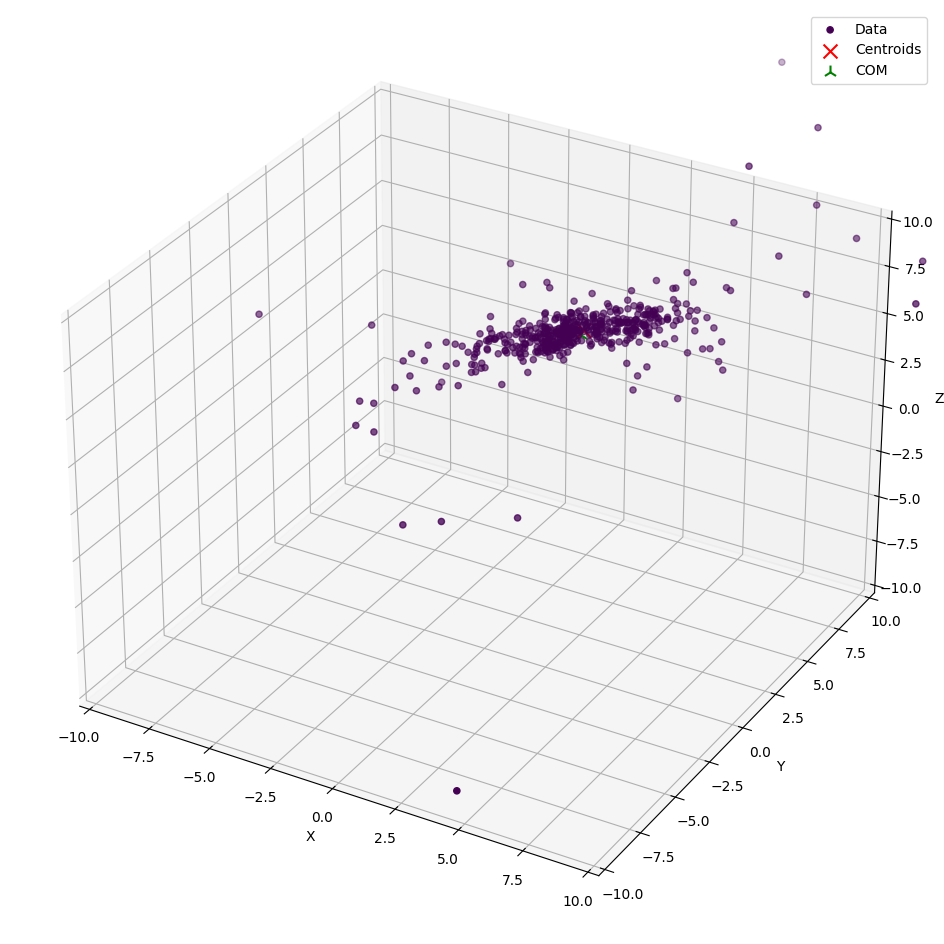

In [57]:
data = np.load('/home/bertinelli/pod_compastro23/project/orbit/Galactic_FoR/500_InitialPos_10.npy')

num_clusters = 2

n=175

# Apply K-means algorithm
kmeans = KMeans(n_clusters=num_clusters, algorithm='elkan')
kmeans.fit(data[n, :, :3])

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Display centroids
print("Cluster centroids:")
for centroid in centroids:
    print(centroid)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# Plot data
ax.scatter(xs=data[n, :, 0], ys=data[n, :, 1], zs=data[n, :, 2], c=kmeans.labels_, label='Data')
# Plot K-means result
ax.scatter(xs=kmeans.cluster_centers_[:, 0], ys=kmeans.cluster_centers_[:, 1], zs=kmeans.cluster_centers_[:, 2], c='red', marker='x', s=100, label='Centroids')

com = np.mean(data[n, :, :3], axis=0)
ax.scatter(xs=com[0], ys=com[1], zs=com[2], c='green', marker='2', s=100, label='COM')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_xlim(-initial_position, initial_position)
ax.set_ylim(-initial_position, initial_position)
ax.set_zlim(-initial_position, initial_position)

plt.show()


Cluster centroids:
[-1.46671909  9.84208501  0.13436053]
[-47.86675139 -41.09253775 -99.78079138]


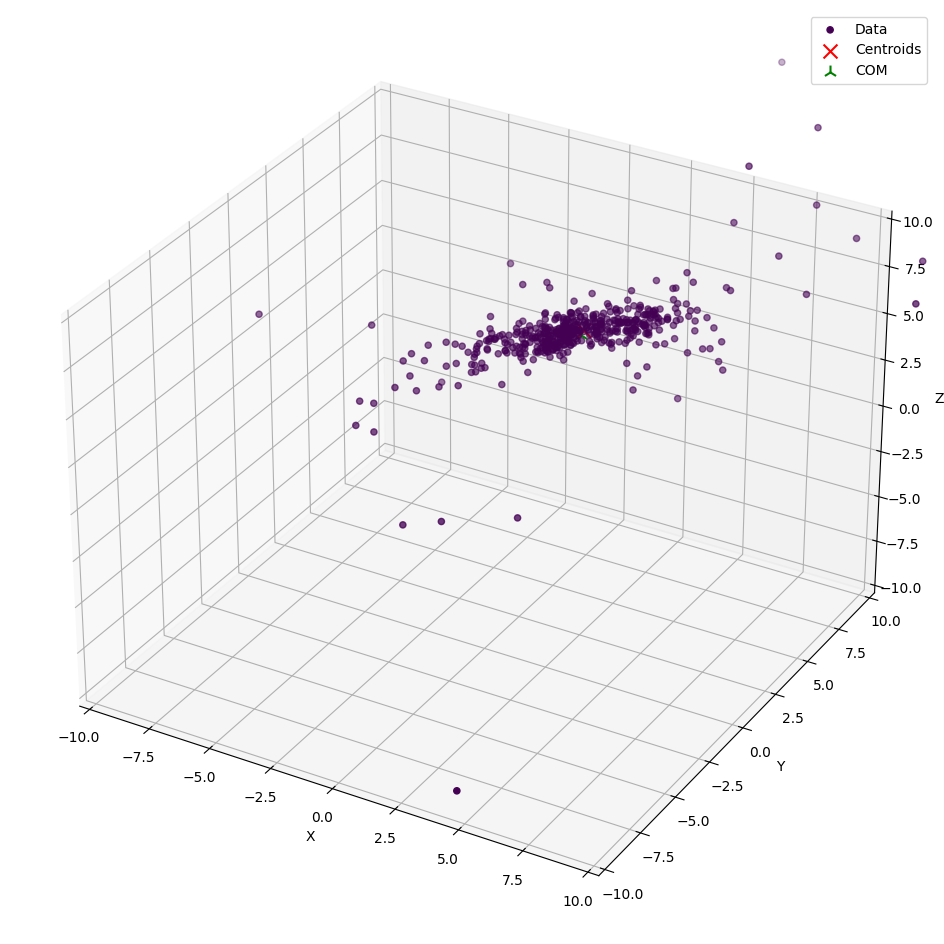

In [59]:

data = np.load('/home/bertinelli/pod_compastro23/project/orbit/Galactic_FoR/500_InitialPos_10.npy')

num_clusters = 2

n=175

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=num_clusters)
gmm.fit(data[n, :, :3])

# Get cluster assignments
labels = gmm.predict(data[n, :, :3])

# Get cluster centroids
centroids = gmm.means_

# Display centroids
print("Cluster centroids:")
for centroid in centroids:
    print(centroid)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# Plot data
ax.scatter(xs=data[n, :, 0], ys=data[n, :, 1], zs=data[n, :, 2], c=labels, label='Data')
# Plot Gaussian Mixture result
ax.scatter(xs=gmm.means_[:, 0], ys=gmm.means_[:, 1], zs=gmm.means_[:, 2], c='red', marker='x', s=100, label='Centroids')

com = np.mean(data[n, :, :3], axis=0)
ax.scatter(xs=com[0], ys=com[1], zs=com[2], c='green', marker='2', s=100, label='COM')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_xlim(-initial_position, initial_position)
ax.set_ylim(-initial_position, initial_position)
ax.set_zlim(-initial_position, initial_position)

plt.show()